In [36]:
# import dependancies
import os
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt

In [37]:
# Define the paths for all source files
cwd = os.getcwd()
orig_test_data_path = os.path.join(cwd,'wine_data','test.csv')
orig_train_data_path = os.path.join(cwd,'wine_data','train.csv')
red_data_path = os.path.join(cwd,'wine_data_2','wineQualityReds.csv')
white_data_path = os.path.join(cwd,'wine_data_2','winequality-white.csv')

In [38]:
# Open all source files as a pd dataframe
orig_test = pd.read_csv(orig_test_data_path)
orig_train = pd.read_csv(orig_train_data_path)
red_data = pd.read_csv(red_data_path)
white_data = pd.read_csv(white_data_path, sep = ';')

There are multiple instances of this data on Kaggle.  The source of this data is from a Portugese reasearch group focusing on red and white wine from Portugal.  
I am curious if the dataset sourced from the Kaggle compitition is just a mashup of the original data.  If so, there are well studied psycological behaviors humans preform that link
their rating of wine based on its color.

In [39]:
#   So...lets compare these datasets.  Fist lets look for duplicates:
def find_duplicate(df):
    duplicate_rows = df[df.duplicated()]
    total_duplicate_count = df.duplicated().sum()

    print()
    print("--------------------------------------------")
    print(f"Duplicate Rows: {duplicate_rows}")
    print(f"Total duplicate rows: {total_duplicate_count}")


In [40]:
orig_test_noID = orig_test.drop(columns='Id')
orig_test_noID.info()
display(orig_test_noID.head())

find_duplicate(orig_test_noID)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1372 non-null   float64
 1   volatile acidity      1372 non-null   float64
 2   citric acid           1372 non-null   float64
 3   residual sugar        1372 non-null   float64
 4   chlorides             1372 non-null   float64
 5   free sulfur dioxide   1372 non-null   float64
 6   total sulfur dioxide  1372 non-null   float64
 7   density               1372 non-null   float64
 8   pH                    1372 non-null   float64
 9   sulphates             1372 non-null   float64
 10  alcohol               1372 non-null   float64
dtypes: float64(11)
memory usage: 118.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.2,0.510,0.01,2.0,0.077,31.0,54.0,0.99748,3.39,0.59,9.8
1,7.2,0.755,0.15,2.0,0.102,14.0,35.0,0.99586,3.33,0.68,10.0
2,8.4,0.460,0.40,2.0,0.065,21.0,50.0,0.99774,3.08,0.65,9.5
3,8.0,0.470,0.40,1.8,0.056,14.0,25.0,0.99480,3.30,0.65,11.7
4,6.5,0.340,0.32,2.1,0.044,8.0,94.0,0.99356,3.23,0.48,12.8



--------------------------------------------
Duplicate Rows: Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol]
Index: []
Total duplicate rows: 0


In [41]:
orig_train_noID = orig_train.drop(columns='Id')
orig_train_noID.info()
display(orig_train_noID.head())

find_duplicate(orig_train_noID)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         2056 non-null   float64
 1   volatile acidity      2056 non-null   float64
 2   citric acid           2056 non-null   float64
 3   residual sugar        2056 non-null   float64
 4   chlorides             2056 non-null   float64
 5   free sulfur dioxide   2056 non-null   float64
 6   total sulfur dioxide  2056 non-null   float64
 7   density               2056 non-null   float64
 8   pH                    2056 non-null   float64
 9   sulphates             2056 non-null   float64
 10  alcohol               2056 non-null   float64
 11  quality               2056 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 192.9 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6



--------------------------------------------
Duplicate Rows: Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []
Total duplicate rows: 0


In [42]:
red_data_noID = red_data.drop(columns='Unnamed: 0')
red_data_noID = red_data_noID.rename(columns={
    'fixed.acidity':'fixed acidity', 
    'volatile.acidity':'volatile acidity', 
    'citric.acid':'citric acid', 
    'residual.sugar':'residual sugar',
    'free.sulfur.dioxide':'free sulfur dioxide', 
    'total.sulfur.dioxide':'total sulfur dioxide'
})
red_data_noID.info()
display(red_data_noID.head())

find_duplicate(red_data_noID)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



--------------------------------------------
Duplicate Rows:       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0

In [43]:
white_data_noID = white_data.copy()
white_data_noID.info()
display(white_data.head())

find_duplicate(white_data_noID)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6



--------------------------------------------
Duplicate Rows:       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.2              0.23         0.32             8.5      0.058   
5               8.1              0.28         0.40             6.9      0.050   
7               7.0              0.27         0.36            20.7      0.045   
8               6.3              0.30         0.34             1.6      0.049   
20              6.2              0.66         0.48             1.2      0.029   
...             ...               ...          ...             ...        ...   
4828            6.4              0.23         0.35            10.3      0.042   
4850            7.0              0.36         0.35             2.5      0.048   
4851            6.4              0.33         0.44             8.9      0.055   
4856            7.1              0.23         0.39            13.7      0.058   
4880            6.6              0.34         0

In [44]:
red_white_data = pd.concat([red_data_noID,white_data_noID], ignore_index=True)
red_white_data.info()
red_white_data

find_duplicate(red_white_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB

--------------------------------------------
Duplicate Rows:       fixed acidity  volatile acidity  citric acid  residual sug

### Duplicate Rows from Original Data
The original red and white wine data sets have 240 and 937 duplicate rows respectfully for a total of 1177 duplicates.  The duplicates are only being accounted for and not removed because it is possible that multiple people can rate the same wine with the same quality score.  It is interesting that there are more duplicate instances with the white wine data than with the red wine data.
When the red and white wine quality datasets are concatinated, 1179 duplicates are identified.  This is 2 more duplicates than red and white datasets alone.  This outcome will also be allowed to stay in the dataset since some light bodied red wines can have similar chemical analysis as a white wine.  

In [45]:
trainable_data = pd.concat([red_white_data, orig_train_noID], ignore_index=True)
trainable_data.info()
display(trainable_data)

find_duplicate(trainable_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8553 entries, 0 to 8552
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         8553 non-null   float64
 1   volatile acidity      8553 non-null   float64
 2   citric acid           8553 non-null   float64
 3   residual sugar        8553 non-null   float64
 4   chlorides             8553 non-null   float64
 5   free sulfur dioxide   8553 non-null   float64
 6   total sulfur dioxide  8553 non-null   float64
 7   density               8553 non-null   float64
 8   pH                    8553 non-null   float64
 9   sulphates             8553 non-null   float64
 10  alcohol               8553 non-null   float64
 11  quality               8553 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 802.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
8548,6.6,0.31,0.13,2.00,0.056,29.0,42.0,0.99388,3.52,0.87,12.0,7
8549,9.7,0.59,0.21,1.80,0.079,27.0,65.0,0.99745,3.14,0.58,9.4,5
8550,7.7,0.43,0.42,1.70,0.071,19.0,37.0,0.99258,3.32,0.77,12.5,8
8551,9.1,0.50,0.00,1.75,0.058,5.0,13.0,0.99670,3.22,0.42,9.5,5



--------------------------------------------
Duplicate Rows:       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
6427            6.4             0.230         0.35           10.30      0.042   
6449            7.0             0.360         0.35            2.50      0.048   
6450            6.4             0.330         0.44            8.90      0.055   
6455            7.1             0.230         0.39           13.70      0.058   
6479            6.6             0.340         0

In [46]:
trainable_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,8553.000000,8553.000000,8553.000000,8553.000000,8553.000000,8553.000000,8553.00000,8553.000000,8553.000000,8553.000000,8553.000000,8553.000000
mean,7.491716,0.384842,0.305755,4.711423,0.062241,27.263475,99.75722,0.995190,3.240633,0.557720,10.473333,5.794926
std,1.488957,0.185052,0.158372,4.366274,0.034487,17.233780,59.12291,0.002898,0.161408,0.153634,1.155849,0.869415
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.00000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.500000,0.250000,0.230000,1.900000,0.041000,14.000000,47.00000,0.993060,3.130000,0.450000,9.500000,5.000000
50%,7.200000,0.330000,0.300000,2.500000,0.054000,25.000000,101.00000,0.995530,3.230000,0.540000,10.300000,6.000000
75%,8.000000,0.500000,0.400000,6.600000,0.078000,37.000000,143.00000,0.997300,3.350000,0.630000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.00000,1.038980,4.010000,2.000000,14.900000,9.000000


In [47]:
trainable_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [48]:
acid_metrics = ['fixed acidity', 'volatile acidity', 'citric acid','pH','chlorides']
sulfur_metrics = ['free sulfur dioxide', 'total sulfur dioxide','sulphates']
texture_metrics = ['residual sugar','density','alcohol', 'quality']

In [49]:
box_orig_train_noID = orig_train_noID.hvplot.box(invert=True,by='Category', title="Original Train Data")
box_red_data_noID = red_data_noID.hvplot.box(invert=True,title="Red Wine")
box_white_data_noID = white_data_noID.hvplot.box(invert=True,title="White Wine")
box_red_white_data = red_white_data.hvplot.box(invert=True,title="Red & White Data")
box_trainable_data = trainable_data.hvplot.box(invert=True,title="All data combined")
(box_orig_train_noID + box_red_data_noID + box_white_data_noID + box_red_white_data + box_trainable_data).cols(2)

:Layout
   .BoxWhisker.I   :BoxWhisker   [Variable]   (value)
   .BoxWhisker.II  :BoxWhisker   [Variable]   (value)
   .BoxWhisker.III :BoxWhisker   [Variable]   (value)
   .BoxWhisker.IV  :BoxWhisker   [Variable]   (value)
   .BoxWhisker.V   :BoxWhisker   [Variable]   (value)

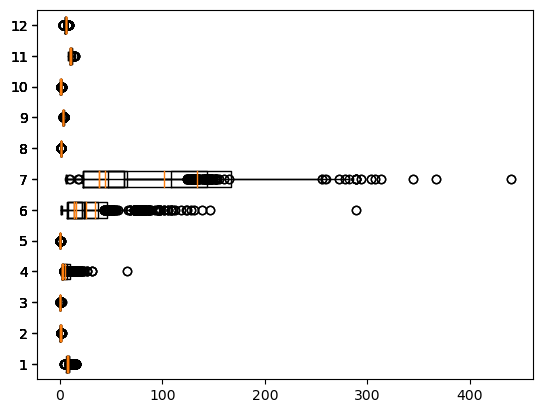

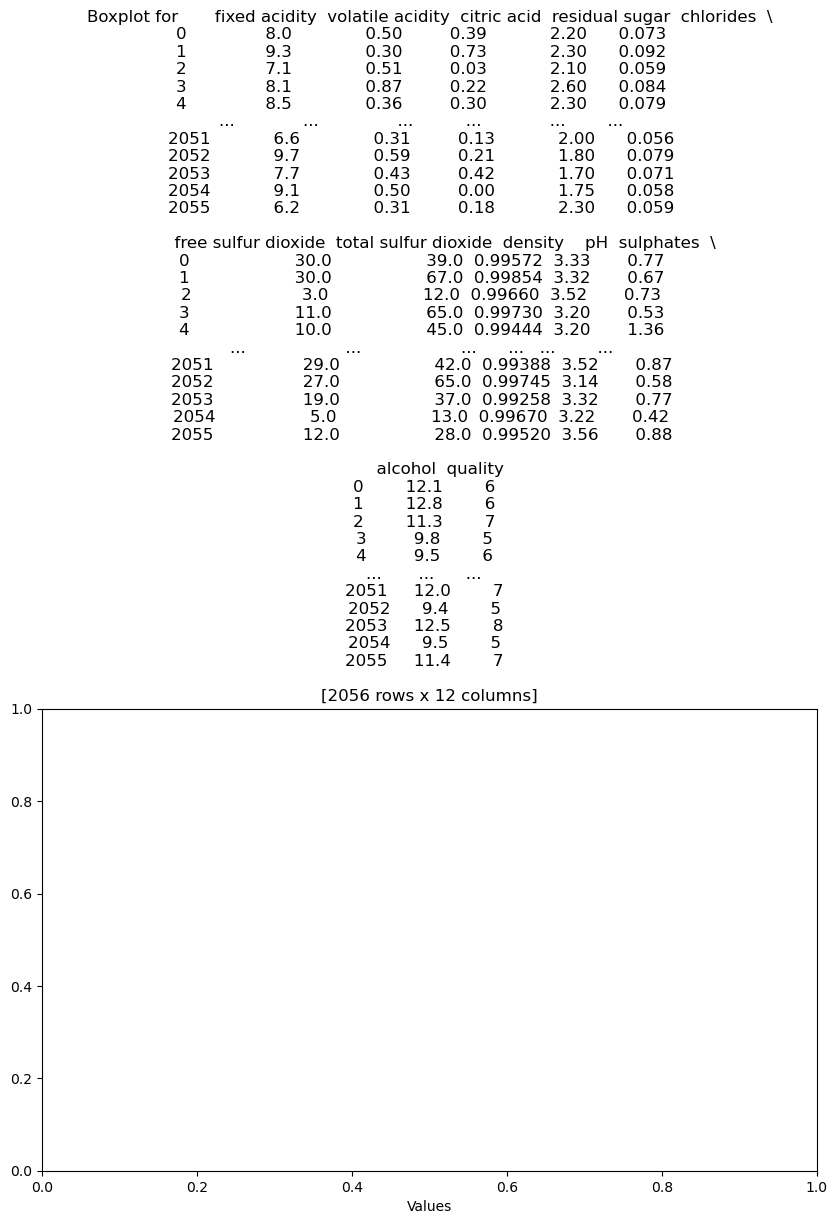

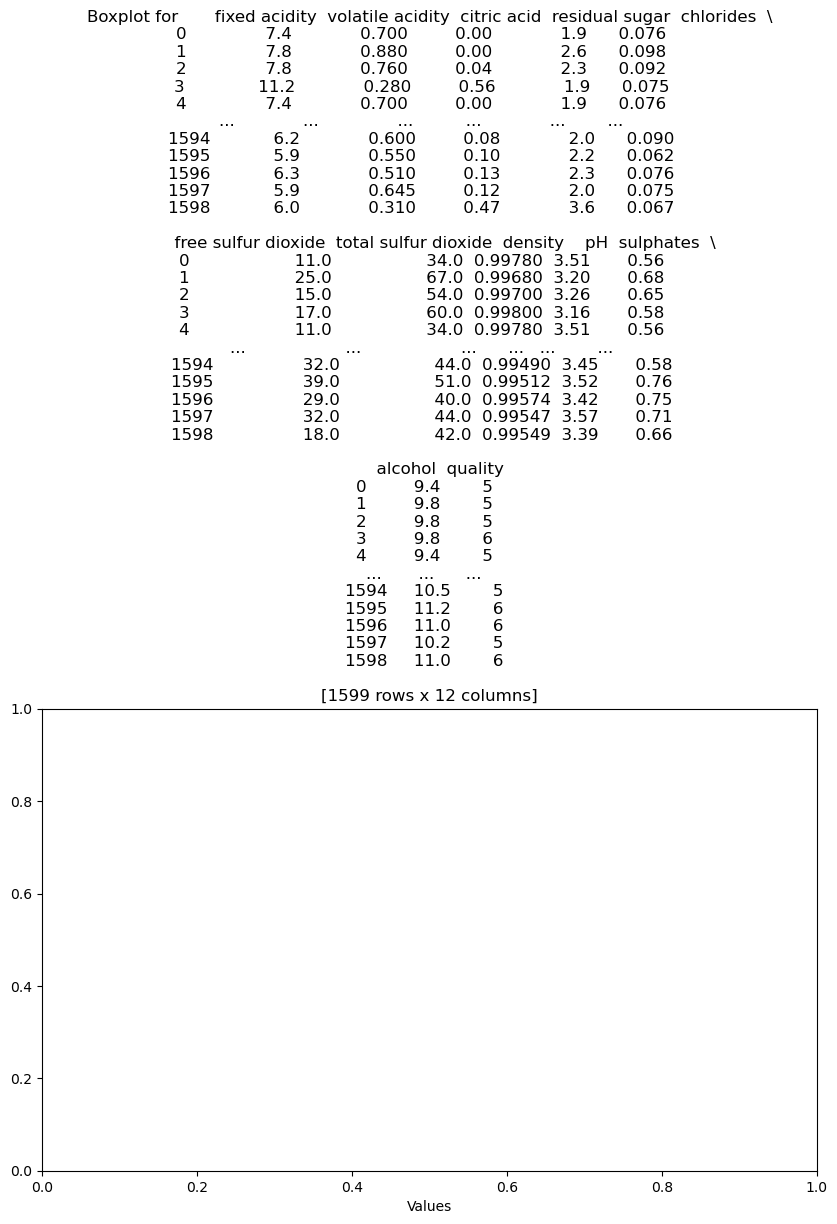

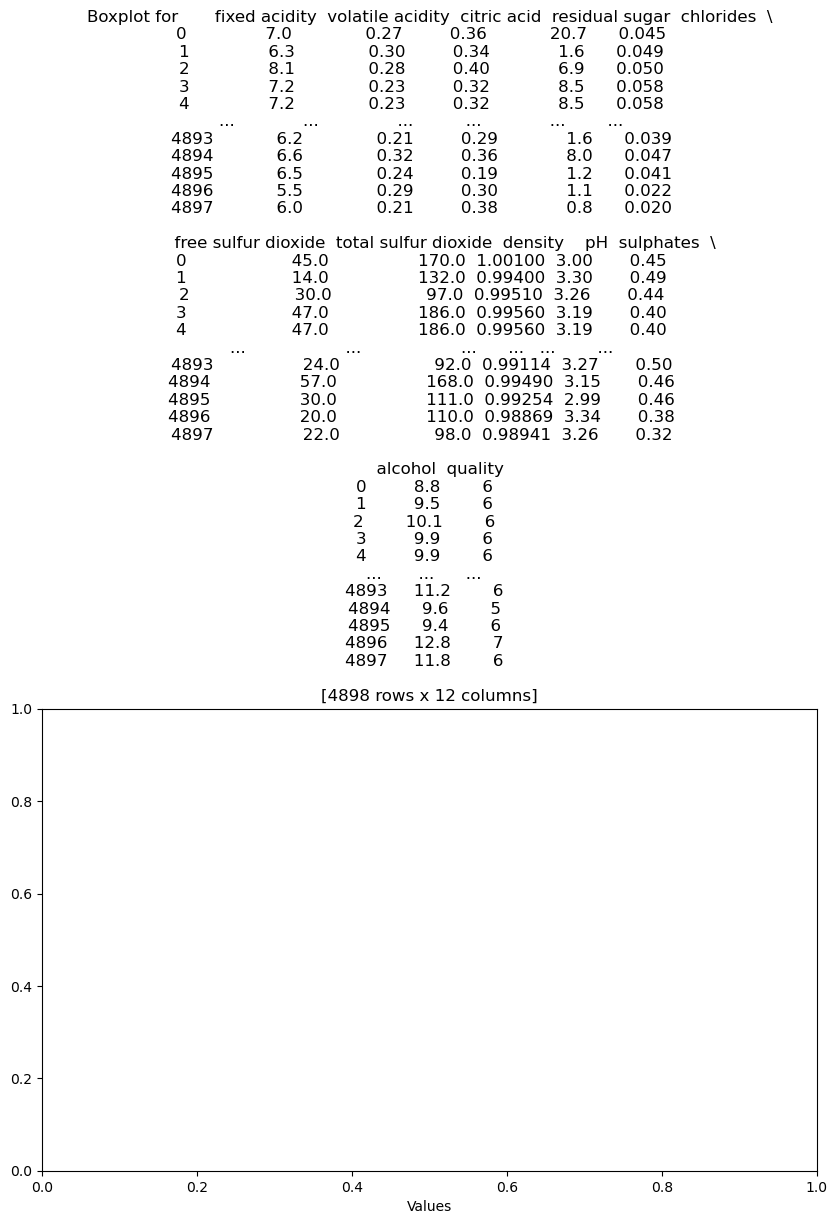

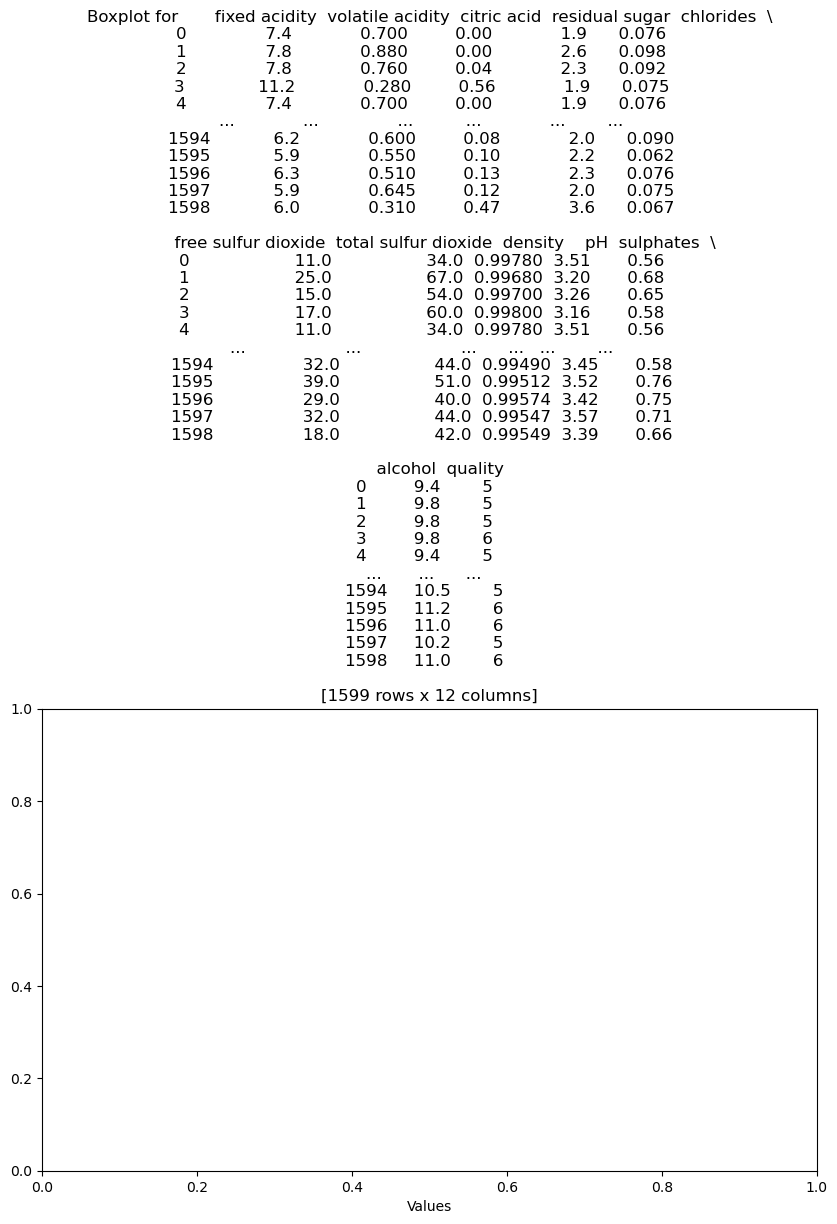

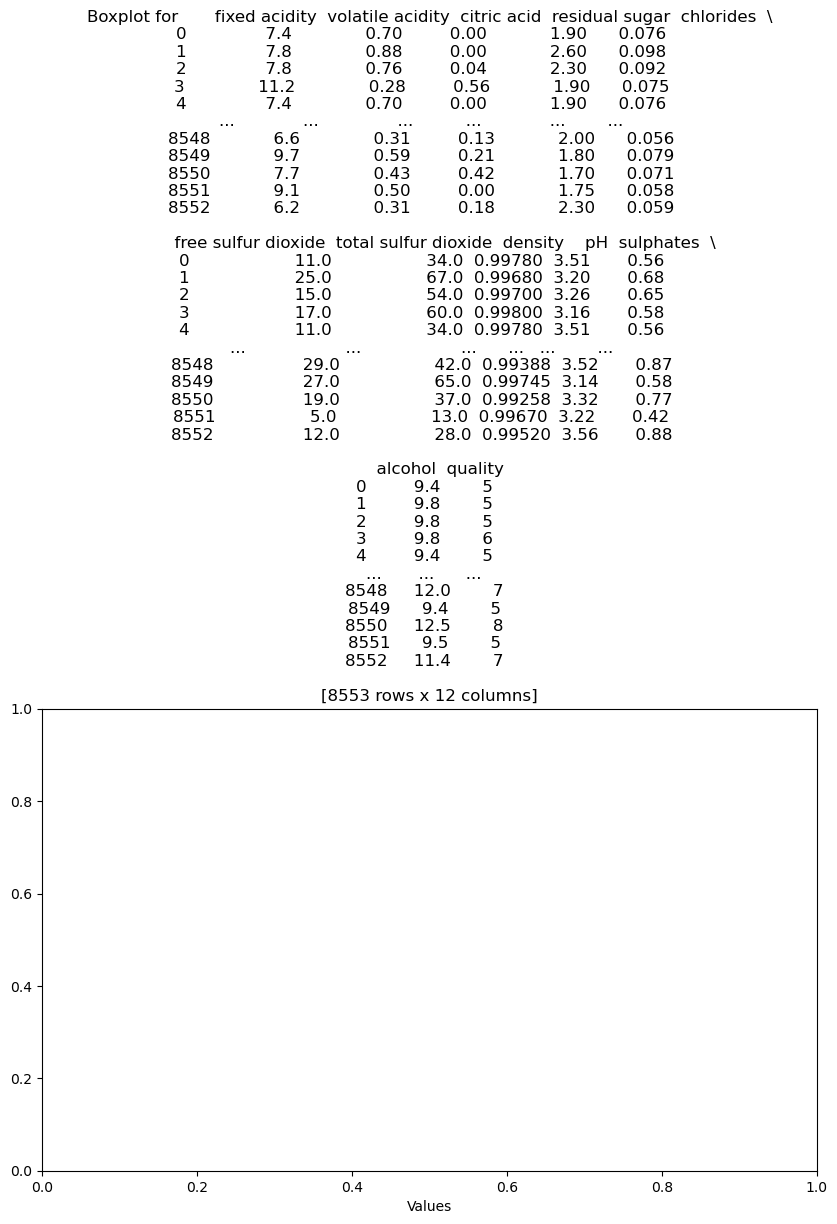

In [84]:
# box_orig_train_noID = orig_train_noID.hvplot.box(invert=True,by='Category', title="Original Train Data")

box_original_train

